# Question 3: Application of the central limit in the Bernoulli distribution

## Ali Borzoozadeh: 810102410

### Part 1:

-----------

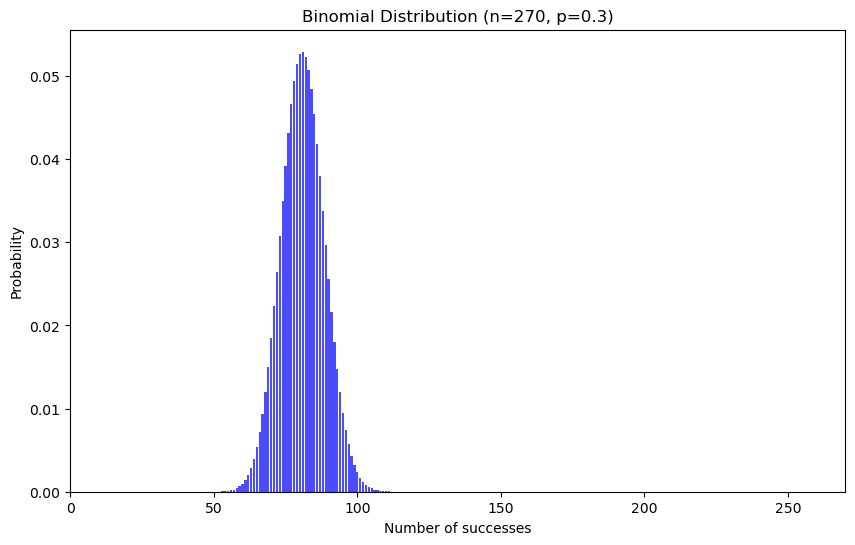

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import binom, norm

n = 270
p = 0.3

x = np.arange(0, n+1)
binom_dist = binom.pmf(x, n, p)

plt.figure(figsize=(10, 6))
plt.bar(x, binom_dist, color='blue', alpha=0.7)
plt.title('Binomial Distribution (n=270, p=0.3)')
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.xlim(0, n)
plt.show()

### Part 2:

-----------

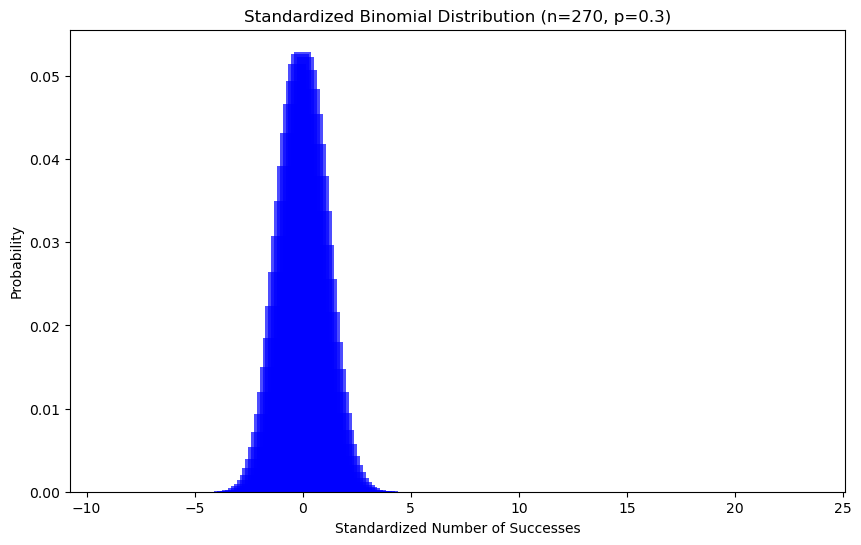

In [2]:
mean = n * p
std_dev = np.sqrt(n * p * (1 - p))

standardized_x = (x - mean) / std_dev

plt.figure(figsize=(10, 6))
plt.bar(standardized_x, binom_dist, color='blue', alpha=0.7)
plt.title('Standardized Binomial Distribution (n=270, p=0.3)')
plt.xlabel('Standardized Number of Successes')
plt.ylabel('Probability')
plt.xlim(standardized_x.min(), standardized_x.max())
plt.show()

### Part 3:

-----------

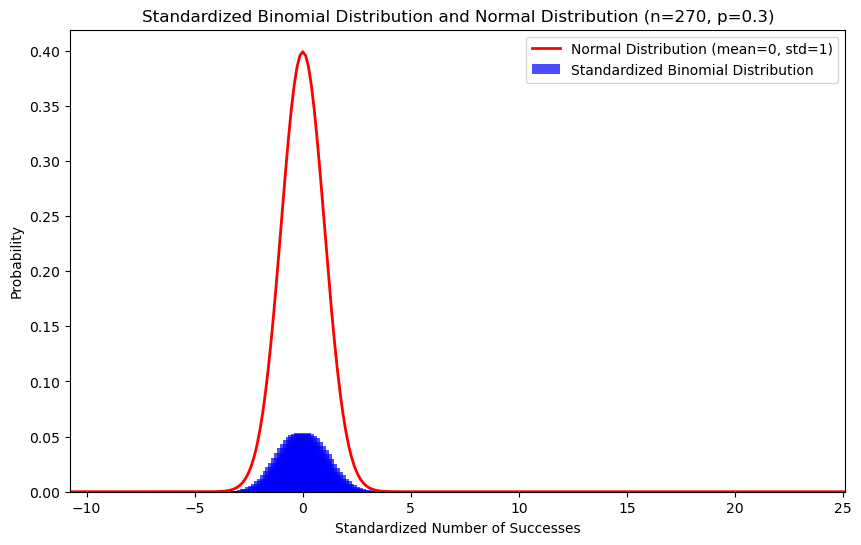

In [3]:
normal_dist = norm.pdf(standardized_x, loc=0, scale=1)

plt.figure(figsize=(10, 6))
plt.bar(standardized_x, binom_dist, color='blue', alpha=0.7, label='Standardized Binomial Distribution')
plt.plot(standardized_x, normal_dist, color='red', lw=2, label='Normal Distribution (mean=0, std=1)')
plt.title('Standardized Binomial Distribution and Normal Distribution (n=270, p=0.3)')
plt.xlabel('Standardized Number of Successes')
plt.ylabel('Probability')
plt.legend()
plt.xlim(standardized_x.min(), standardized_x.max())
plt.show()

#### The binomial graph is not close to the normal graph and has a much shorter height.

### Part 4:

------------

In [4]:
sum_of_bars = np.sum(binom_dist)
print("Sum of the lengths of the bars:", sum_of_bars)

Sum of the lengths of the bars: 1.0000000000000007


#### To normalize the binomial graph, we only normalized the x-axis and kept the y-axis as before, which causes this problem.

### Part 5:

-----------

#### Riemann sum: $\int_{a}^{b} f(x) dx \approx \frac{b-a}{N} \sum_{i=1}^{N} f(x_i) \quad ; \quad x_i = a + i \frac{b-a}{N}$

In [5]:
a = standardized_x.min()
b = standardized_x.max()
N = len(standardized_x)
dx = (b - a) / N
binom_integral = np.sum(binom_dist) * dx

coefficient = binom_integral / np.sum(normal_dist * dx)
print("Coefficient:", coefficient)

print("Standard Deviation in Part 1:", std_dev)

Coefficient: 0.1328031788149327
Standard Deviation in Part 1: 7.52994023880668


#### The coefficient obtained is the inverse of the standard deviation.

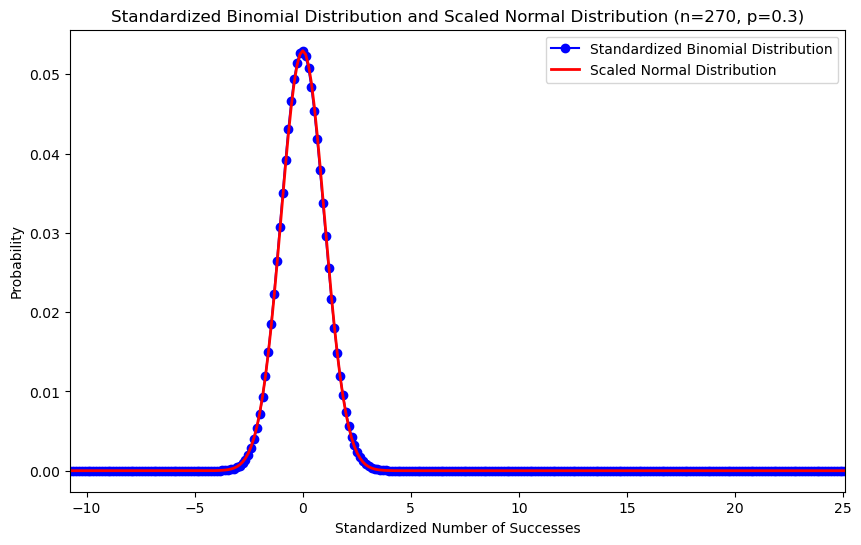

In [6]:
scaled_normal_dist = normal_dist * coefficient

plt.figure(figsize=(10, 6))
plt.plot(standardized_x, binom_dist, 'o-', color='blue', label='Standardized Binomial Distribution')
plt.plot(standardized_x, scaled_normal_dist, color='red', lw=2, label='Scaled Normal Distribution')
plt.title('Standardized Binomial Distribution and Scaled Normal Distribution (n=270, p=0.3)')
plt.xlabel('Standardized Number of Successes')
plt.ylabel('Probability')
plt.legend()
plt.xlim(standardized_x.min(), standardized_x.max())
plt.show()

### Part 6:

-----------

#### $\lim_{n \to \infty} P \left( a \leq \frac{S_n - np}{\sqrt{npq}} \leq b \right) = \int_a^b \phi(x) \, dx$

In [7]:
n = 100
k = 55
p = 0.5

binom_prob = stats.binom.pmf(k, n, p)

# Normal approximation
mean = n * p
std_dev = (n * p * (1 - p)) ** 0.5

z_lower = (k - 0.5 - mean) / std_dev
z_upper = (k + 0.5 - mean) / std_dev

normal_prob = norm.cdf(z_upper) - norm.cdf(z_lower)

print("Binomial Probability:", binom_prob)
print("Normal Approximation Probability:", normal_prob)

Binomial Probability: 0.04847429662643072
Normal Approximation Probability: 0.04839406440037686


### Part 7:

-----------

In [8]:
k_min = 40
k_max = 60

binom_prob = stats.binom.cdf(k_max, n, p) - stats.binom.cdf(k_min - 1, n, p)

# Normal approximation
z_lower = (k_min - mean) / std_dev
z_upper = (k_max + 0.5 - mean) / std_dev

normal_prob = norm.cdf(z_upper) - norm.cdf(z_lower)

print(f"Probability using binomial distribution: {binom_prob:.6f}")
print(f"Probability using normal approximation: {normal_prob:.6f}")

Probability using binomial distribution: 0.964800
Probability using normal approximation: 0.959385
